# Image retrieval using deep features

In [19]:
import turicreate

# Load some CIFAR-10 images

In [20]:
image_data = turicreate.SFrame('image_train_data/')

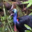

In [29]:
image_data['image'][0]

In [22]:
image_data[image_data['image']<0]

RuntimeError: Unsupported type operation. cannot perform operation < between image and integer

In [21]:
image_data['image'].explore()

ValueError: Value must be a nonnegative integer or None

# Compute deep features from our images

In [8]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [9]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [10]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [11]:
cat = image_data[18:19]

In [12]:
cat['image'].explore()

ValueError: Value must be a nonnegative integer or None

In [18]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.584ms      |

| Done         |         | 100         | 81.932ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [14]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [15]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.618ms      |

| Done         |         | 100         | 87.902ms     |

+--------------+---------+-------------+--------------+

In [16]:
cat_neighbors['image'].explore()

id,image,label,deep_features,image_array
384,Height: 32 Width: 32,cat,"[1.0440353155136108, 0.0,0.0, 0.0, 0.0, 0.0, ...","[46.0, 45.0, 50.0, 47.0,45.0, 51.0, 45.0, 44.0, ..."
6910,Height: 32 Width: 32,cat,"[1.5547490119934082, 0.0,0.0, 0.0, 0.0, 0.0, ...","[154.0, 133.0, 92.0,134.0, 112.0, 75.0, ..."
36870,Height: 32 Width: 32,cat,"[0.24048322439193726,0.0, 0.0, 0.0, 0.0, 0.0, ...","[16.0, 20.0, 19.0, 14.0,19.0, 17.0, 11.0, 15.0, ..."
39777,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.420721054077148, ...","[145.0, 166.0, 165.0,164.0, 185.0, 184.0, ..."
41734,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.671506881713867, ...","[122.0, 27.0, 34.0,120.0, 24.0, 31.0, 11 ..."


# Find images similar to a car

In [ ]:
car = image_data[8:9]

In [ ]:
car['image'].explore()

In [ ]:
get_images_from_ids(knn_model.query(car))['image'].explore()

# Create a lambda function to find and show nearest neighbors to an image

In [ ]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'].explore()

In [ ]:
show_neighbors(8)

NameError: name 'get_images_from_ids' is not defined

In [ ]:
show_neighbors(26)

NameError: name 'get_images_from_ids' is not defined

In [ ]:
show_neighbors(500)